In [4]:
import logging
import sys

import matplotlib.pyplot as plt

root = logging.getLogger()
root.setLevel(logging.INFO)

handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
root.addHandler(handler)

In [5]:
import sys
sys.path.append('../')

import numpy as np
from tqdm.notebook import trange
from scripts import graph_osm_loader, utils

import networkx as nx


In [6]:
def get_rand_graph(N, p):
    G = nx.fast_gnp_random_graph(N, p, directed=False)
    if not nx.is_connected(G):
        tmp = []
        for n in nx.connected_components(G):
            for q in n:
                tmp.append(q)
                break
        for i in range(len(tmp) - 1):
            G.add_edge(tmp[i], tmp[i + 1])
    for e in G.edges:
        G.add_edge(e[0], e[1], length=np.random.random_sample() + 0.001)
    for u in G.nodes:
        if u in G[u]:
            G.remove_edge(u, u)
    return G

In [7]:
GRAPH_ID = 'R13470549'  # R13470549 R2555133 R3766483
# примеры id есть в graph_osm_loader.py
# g = get_rand_graph(1000, 0.1)  # загрузка графа
N = 10000
p = 3 / N
# g = get_rand_graph(N,p)
# g = get_graph()
g = graph_osm_loader.get_graph(GRAPH_ID)
print(len(g.nodes), len(g.edges))

723 1046


In [8]:
g.remove_edges_from(nx.selfloop_edges(g))

In [9]:
from scripts import pipeline
from scripts.path_findings import dijkstra_pfa, ch_builder

In [10]:
baseline = dijkstra_pfa.Dijkstra(g)
test_alg = ch_builder.GreedyBuilder().build_ch_pfa(g)

build ch graph:   0%|          | 0/723 [00:00<?, ?it/s]

In [12]:
points = [utils.get_node_for_initial_graph(g) for _ in trange(100, desc='generate points')]

generate points:   0%|          | 0/100 [00:00<?, ?it/s]

In [13]:
comp = pipeline.PfaComparator(
    baseline=baseline, 
    test_algorithm=test_alg,
    points=points,
    workers= 10,
    iterations= 3
)
res = comp.compare()
res.get_err().mean(), res.get_acceleration().mean()

start 0


find paths:   0%|          | 0/10 [00:00<?, ?it/s]

start 1


find paths:   0%|          | 0/10 [00:00<?, ?it/s]

start 2


find paths:   0%|          | 0/10 [00:00<?, ?it/s]

start 3


find paths:   0%|          | 0/10 [00:00<?, ?it/s]

start 4


find paths:   0%|          | 0/10 [00:00<?, ?it/s]

start 5


find paths:   0%|          | 0/10 [00:00<?, ?it/s]

start 6


find paths:   0%|          | 0/10 [00:00<?, ?it/s]

start 7


find paths:   0%|          | 0/10 [00:00<?, ?it/s]

start 8


find paths:   0%|          | 0/10 [00:00<?, ?it/s]

start 9


find paths:   0%|          | 0/10 [00:00<?, ?it/s]

(np.float64(-1.1898731224943933e-15), np.float64(3.0368593020640513))

In [14]:
res


        err_max:    0.0000
        err_min:    -0.0000
        err_median: 0.0000
        err_mean:   -0.0000
        
        acceleration_max:    7.3300
        acceleration_min:    0.5749
        acceleration_median: 2.9076
        acceleration_mean:   3.0369
        

{'whiskers': [<matplotlib.lines.Line2D at 0x73125737e6f0>,
 'caps': [<matplotlib.lines.Line2D at 0x73125737d400>,
 'boxes': [<matplotlib.lines.Line2D at 0x73125737c620>],
 'medians': [<matplotlib.lines.Line2D at 0x73125737caa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x73125737f4d0>],
 'means': []}

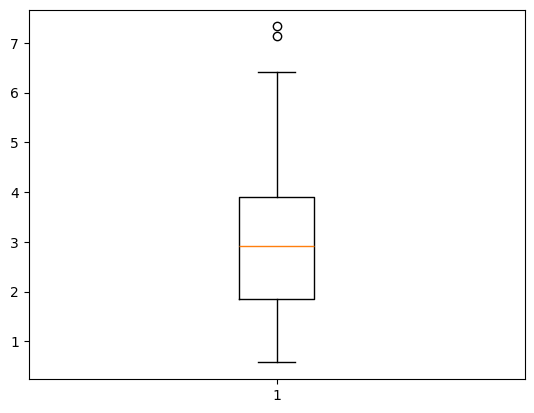

In [16]:
# plt.boxplot(res.get_err())
plt.boxplot(res.get_acceleration())